In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
Ar= 1   #Amplitude
f_res = 2000    #Resonant Frequency in Hz
b=500       #Exponential decay factor
α=4      #Fault characteristic coeficient
fs=1e4  #Freq. Sampling

N=1000
n=np.arange(N)
t=n/fs

fr_var=25*np.ones((N,))
#fr_var=np.linspace(20,80,N)
f_fail=α*fr_var
ω_fail=2*np.pi*f_fail
θr_fail=np.cumsum(ω_fail)/fs

#### Reference : Bearing signal models and their effect on bearing diagnostics, P. Borghesani et al., 2022

#### Periodic Model

![Periodic Model](figs/model1.png)

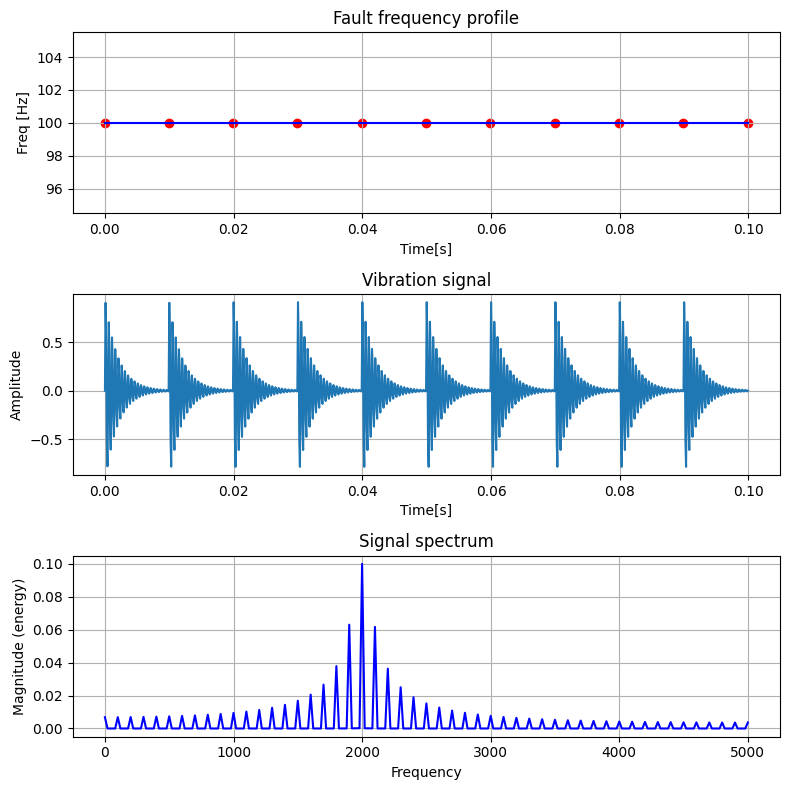

Entropy:  4.472865134331082


In [3]:
t_indexes=[]
t_impact=[]
N_of_impacts=np.int32(np.floor(np.max(θr_fail)/(2*np.pi)))+1
for i in range(N_of_impacts):
    t_index=np.argmin(np.abs(θr_fail-i*2*np.pi))
    t_indexes.append(t_index)
    t_impact.append(t[t_index])
    #print(i,t_index,t[t_index])

impacts=[np.array(t_indexes),np.array(t_impact)]



Sx_var=np.zeros((N,))

for r in range(len(t_impact)):
    Sx_var+=Ar*np.sin(2*np.pi*f_res*(n/fs-t_impact[r]))*np.exp(-b*(n/fs-t_impact[r]))*np.heaviside(n/fs-t_impact[r], 1)



fig, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(8, 8))

#ax1.figure(figsize=(5,3)) ### change tuple for better visualization or change inline for qt in %matplotlib inline 
ax1.plot(t,f_fail,color='blue')
ax1.set_title('Fault frequency profile')
ax1.set_xlabel('Time[s]')
ax1.set_ylabel('Freq [Hz]')
ax1.grid()
ax1.scatter(impacts[1],f_fail[impacts[0]],color='red',marker='o')

#ax2.figure(figsize=(5,3))
ax2.plot(t,Sx_var)
ax2.grid(True)
ax2.set_title('Vibration signal')
ax2.set_xlabel('Time[s]')
ax2.set_ylabel('Amplitude')

spectrum=ax3.magnitude_spectrum(Sx_var, Fs=fs, color='blue')
ax3.set_title("Signal spectrum")
ax3.grid(True)

plt.tight_layout()
plt.show()

probs = spectrum[0] / spectrum[0].sum(axis=-1, keepdims=True)
epsilon = np.finfo(float).eps
log_probs = np.log(probs + epsilon)
entropy = -(probs * log_probs).sum(axis=-1)
print('Entropy: ',entropy)

#### Cyclostationary Model

![Cyclostationary Model](figs/model2.png)

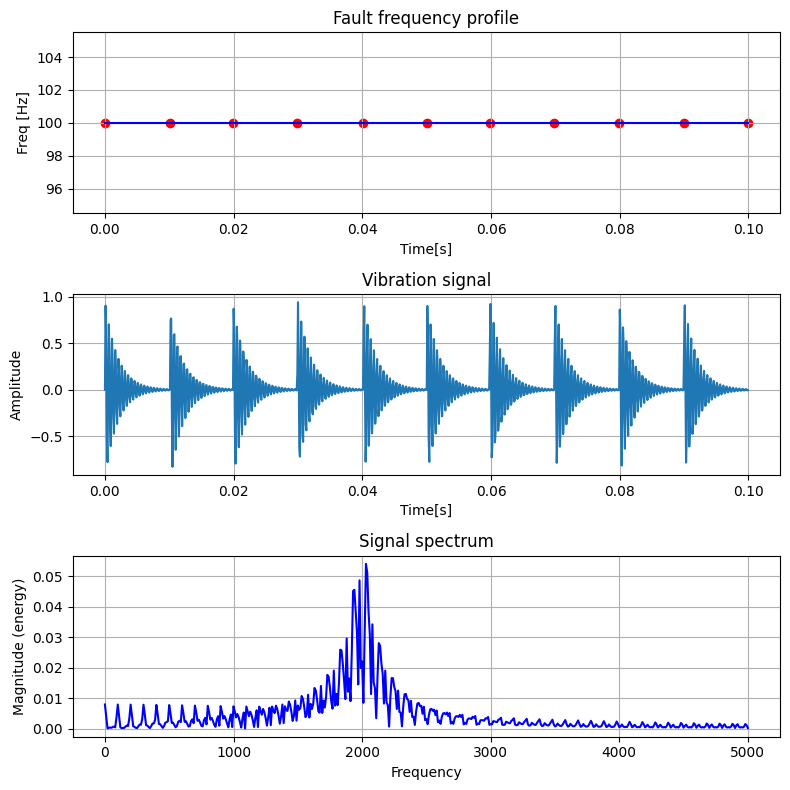

Entropy:  5.500919054920596


In [4]:
t_indexes=[]
t_impact=[]
N_of_impacts=np.int32(np.floor(np.max(θr_fail)/(2*np.pi)))+1
for i in range(N_of_impacts):
    t_index=np.argmin(np.abs(θr_fail-i*2*np.pi))
    t_indexes.append(t_index)
    t_impact.append(t[t_index])
    #print(i,t_index,t[t_index])

var_param=0.0001
t_impact[1:-1]=np.random.normal(t_impact[1:-1], var_param)
t_indexes=np.array(np.round(t_impact,4)*1e4,dtype=int)

impacts=(np.array(t_indexes),np.array(t_impact))

Sx_var=np.zeros((N,))

for r in range(len(t_impact)):
    Sx_var+=Ar*np.sin(2*np.pi*f_res*(n/fs-t_impact[r]))*np.exp(-b*(n/fs-t_impact[r]))*np.heaviside(n/fs-t_impact[r], 1)

fig, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(8, 8))

#ax1.figure(figsize=(5,3)) ### change tuple for better visualization or change inline for qt in %matplotlib inline 
ax1.plot(t,f_fail,color='blue')
ax1.set_title('Fault frequency profile')
ax1.set_xlabel('Time[s]')
ax1.set_ylabel('Freq [Hz]')
ax1.grid()
ax1.scatter(impacts[1],f_fail[impacts[0]],color='red',marker='o')

#ax2.figure(figsize=(5,3))
ax2.plot(t,Sx_var)
ax2.grid(True)
ax2.set_title('Vibration signal')
ax2.set_xlabel('Time[s]')
ax2.set_ylabel('Amplitude')

spectrum=ax3.magnitude_spectrum(Sx_var, Fs=fs, color='blue')
ax3.set_title("Signal spectrum")
ax3.grid(True)

plt.tight_layout()
plt.show()

probs = spectrum[0] / spectrum[0].sum(axis=-1, keepdims=True)
epsilon = np.finfo(float).eps
log_probs = np.log(probs + epsilon)
entropy = -(probs * log_probs).sum(axis=-1)
print('Entropy: ',entropy)

#### Pseudo-Cyclostationary Model

![Pseudo-Cyclostationary Model](figs/model3.png)

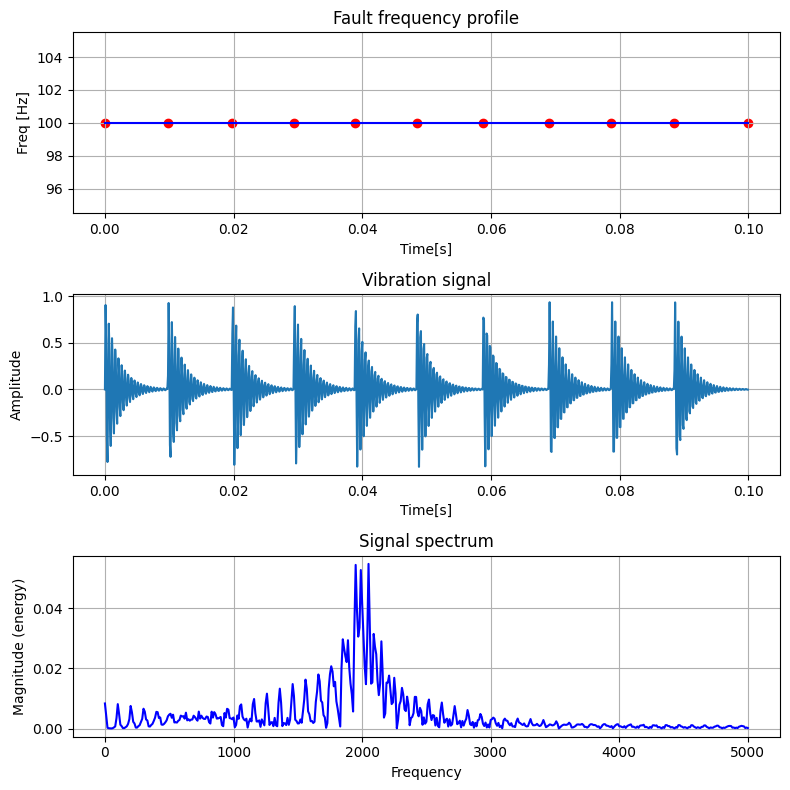

Entropy:  5.421225743807497


In [5]:
t_indexes=[]
t_impact=[]
N_of_impacts=np.int32(np.floor(np.max(θr_fail)/(2*np.pi)))+1
for i in range(N_of_impacts):
    t_index=np.argmin(np.abs(θr_fail-i*2*np.pi))
    t_indexes.append(t_index)
    t_impact.append(t[t_index])

mean_param=t_impact[1]
var_param=0.0003

for i in range(len(t_impact)-2):
    t_impact[i+1] = np.random.normal(t_impact[i]+mean_param, var_param)
t_indexes=np.array(np.round(t_impact,4)*1e4,dtype=int)

impacts=(np.array(t_indexes),np.array(t_impact))

Sx_var=np.zeros((N,))

for r in range(len(t_impact)):
    Sx_var+=Ar*np.sin(2*np.pi*f_res*(n/fs-t_impact[r]))*np.exp(-b*(n/fs-t_impact[r]))*np.heaviside(n/fs-t_impact[r], 1)

fig, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(8, 8))

#ax1.figure(figsize=(5,3)) ### change tuple for better visualization or change inline for qt in %matplotlib inline 
ax1.plot(t,f_fail,color='blue')
ax1.set_title('Fault frequency profile')
ax1.set_xlabel('Time[s]')
ax1.set_ylabel('Freq [Hz]')
ax1.grid()
ax1.scatter(impacts[1],f_fail[impacts[0]],color='red',marker='o')

#ax2.figure(figsize=(5,3))
ax2.plot(t,Sx_var)
ax2.grid(True)
ax2.set_title('Vibration signal')
ax2.set_xlabel('Time[s]')
ax2.set_ylabel('Amplitude')

spectrum=ax3.magnitude_spectrum(Sx_var, Fs=fs, color='blue')
ax3.set_title("Signal spectrum")
ax3.grid(True)

plt.tight_layout()
plt.show()

probs = spectrum[0] / spectrum[0].sum(axis=-1, keepdims=True)
epsilon = np.finfo(float).eps
log_probs = np.log(probs + epsilon)
entropy = -(probs * log_probs).sum(axis=-1)
print('Entropy: ',entropy)

#### Mixed Model

![Mixed Model](figs/model4.png)

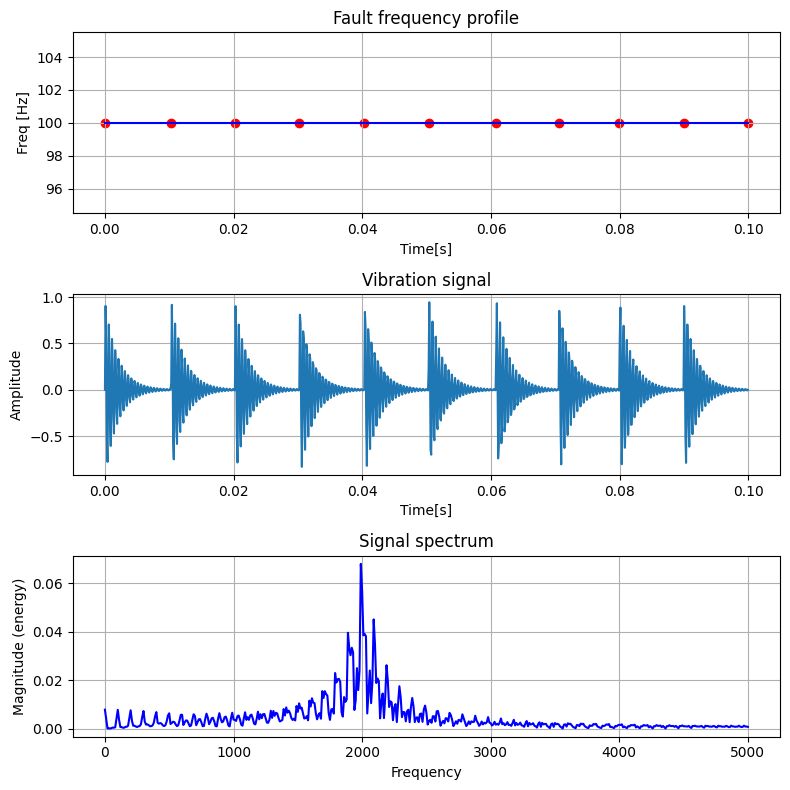

Entropy:  5.535617833203934


In [6]:
t_indexes=[]
t_impact=[]
N_of_impacts=np.int32(np.floor(np.max(θr_fail)/(2*np.pi)))+1
for i in range(N_of_impacts):
    t_index=np.argmin(np.abs(θr_fail-i*2*np.pi))
    t_indexes.append(t_index)
    t_impact.append(t[t_index])

mean_param=t_impact[1]
var_param=0.0003
var_param2=0.0001
for i in range(len(t_impact)-2):
    t_impact[i+1] = np.random.normal(t_impact[i]+mean_param, var_param) + np.random.normal(0, var_param2)
t_indexes=np.array(np.round(t_impact,4)*1e4,dtype=int)

impacts=(np.array(t_indexes),np.array(t_impact))

Sx_var=np.zeros((N,))

for r in range(len(t_impact)):
    Sx_var+=Ar*np.sin(2*np.pi*f_res*(n/fs-t_impact[r]))*np.exp(-b*(n/fs-t_impact[r]))*np.heaviside(n/fs-t_impact[r], 1)

fig, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(8, 8))

#ax1.figure(figsize=(5,3)) ### change tuple for better visualization or change inline for qt in %matplotlib inline 
ax1.plot(t,f_fail,color='blue')
ax1.set_title('Fault frequency profile')
ax1.set_xlabel('Time[s]')
ax1.set_ylabel('Freq [Hz]')
ax1.grid()
ax1.scatter(impacts[1],f_fail[impacts[0]],color='red',marker='o')

#ax2.figure(figsize=(5,3))
ax2.plot(t,Sx_var)
ax2.grid(True)
ax2.set_title('Vibration signal')
ax2.set_xlabel('Time[s]')
ax2.set_ylabel('Amplitude')

spectrum=ax3.magnitude_spectrum(Sx_var, Fs=fs, color='blue')
ax3.set_title("Signal spectrum")
ax3.grid(True)

plt.tight_layout()
plt.show()

probs = spectrum[0] / spectrum[0].sum(axis=-1, keepdims=True)
epsilon = np.finfo(float).eps
log_probs = np.log(probs + epsilon)
entropy = -(probs * log_probs).sum(axis=-1)
print('Entropy: ',entropy)